In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [16]:
df_raw=pd.read_csv('./raw_data/pima-indians-diabetes.data.csv')
df = df_raw.copy()

In [17]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,-1].values

In [18]:
scaler = MinMaxScaler()
x_dataN = scaler.fit_transform(x_data)
x_train,x_test,y_train,y_test = train_test_split(x_dataN, y_data,
                                                 test_size=0.3,
                                                 stratify=y_data)


In [19]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


In [20]:
dense = Dense(units=1,input_dim=8,activation='sigmoid')
model = Sequential([dense])
model.compile(loss='binary_crossentropy',optimizer=Adam(0.1),metrics=['acc'])
h = model.fit(x_train,y_train,epochs=30)

Epoch 1/30
 9/17 [==============>...............] - ETA: 0s - loss: 0.7054 - acc: 0.5972

2022-12-01 15:05:15.367390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 8ms/step - loss: 0.7089 - acc: 0.6071
Epoch 2/30
17/17 [==============================] - 0s 5ms/step - loss: 0.6479 - acc: 0.6350
Epoch 3/30
17/17 [==============================] - 0s 5ms/step - loss: 0.6029 - acc: 0.6629
Epoch 4/30
17/17 [==============================] - 0s 6ms/step - loss: 0.5865 - acc: 0.6853
Epoch 5/30
17/17 [==============================] - 0s 6ms/step - loss: 0.5723 - acc: 0.6797
Epoch 6/30
17/17 [==============================] - 0s 6ms/step - loss: 0.5590 - acc: 0.7095
Epoch 7/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5484 - acc: 0.6983
Epoch 8/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5401 - acc: 0.7281
Epoch 9/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5384 - acc: 0.7244
Epoch 10/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5351 - acc: 0.7318
Epoch 11/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5246 

In [32]:
y_pred = (model.predict(x_test) > 0.5)+0

8/8 [==============================] - 0s 3ms/step


In [33]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [35]:
f1_score(y_test,y_pred)

0.5365853658536585

In [34]:
model.evaluate(x_train,y_train)
# [cost, acc]

17/17 [==============================] - 0s 5ms/step - loss: 0.4956 - acc: 0.7691


2022-12-01 15:09:29.846022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.4956468343734741, 0.769087553024292]

<AxesSubplot: >

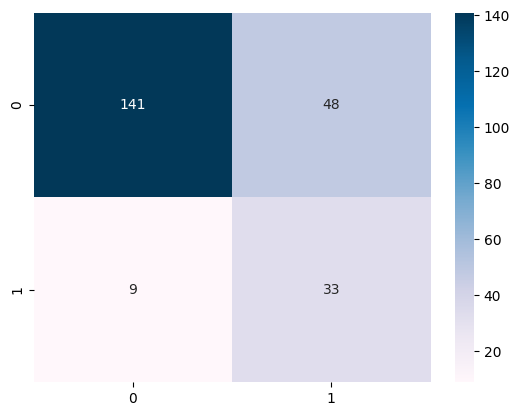

In [31]:
sns.heatmap(confusion_matrix(y_pred,y_test),
            annot=True,
            fmt='.0f',
            cmap=plt.cm.PuBu)